In [86]:
import numpy as np
import matplotlib.pyplot as plt
# import mean squared error
from sklearn.metrics import mean_squared_error


In [28]:
#load data/dynamic_input_mean.npy file
dynamic_input_mean = np.load('../data/dynamic_input_mean.npy')
dynamic_input_std = np.load('../data/dynamic_input_std.npy')
print (dynamic_input_mean)
print (dynamic_input_std)

[0.1197112  1.73881751 0.11084138 1.7988615  0.1094989  1.81207202
 0.10324037 1.71015936]
[1.6551339  5.82894155 1.54915965 6.13199342 1.51485388 6.19980411
 1.47532519 5.83794635]


In [203]:
# load .npy files from the work_dir/bnrelu/ folder
# make 7days_6chvol_bnrelu_hid into dataset+_+channel+_+model
dataset = '7daysv4'
channel = '6chvol'
#channel = '6chspeed'
model = ['unet', 'unet_reg', 'hid', 'hid_reg', 'unet_regmse']
#model = ['unet', 'unetd1w6', 'hid', 'bnrelu']
city = ['berlin', 'antwerp', 'moscow', 'moscow1040']
city_id = 3
trues = np.load(f'../work_dirs/{dataset}_{channel}_{model[0]}/saved_{city[city_id]}/trues.npy')
preds1 = np.load(f'../work_dirs/{dataset}_{channel}_{model[0]}/saved_{city[city_id]}/preds.npy')
preds2 = np.load(f'../work_dirs/{dataset}_{channel}_{model[1]}/saved_{city[city_id]}/preds.npy')
preds3 = np.load(f'../work_dirs/{dataset}_{channel}_{model[2]}/saved_{city[city_id]}/preds.npy')
preds4 = np.load(f'../work_dirs/{dataset}_{channel}_{model[3]}/saved_{city[city_id]}/preds.npy')


In [204]:
preds2 = np.load(f'../work_dirs/7daysv4_6chvol_bnrelu/saved/preds.npy')
preds3 = np.load(f'../work_dirs/7daysv4_12chvol_bnrelussl/saved/preds.npy')
preds5 = np.load(f'../work_dirs/7daysv2_6chvol_bnrelu/saved/preds.npy')

In [119]:
preds5 = np.load(f'../work_dirs/7daysv4_12chvol_bnrelussl/saved/preds.npy')
preds5 = preds5[:,0:6,:,:,:]

In [36]:
# load .npy files from the work_dir/bnrelu/ folder
trues = np.load('../work_dirs/7days_6chvol_hid/saved/trues.npy')
preds = np.load('../work_dirs/7days_6chvol_unet/saved/preds.npy')
preds1 = np.load('../work_dirs/7days_6chvol_hid/saved/preds.npy')
preds2 = np.load('../work_dirs/7days_ch6vol_simunet/saved/preds.npy')
preds2 = np.load('../work_dirs/7days_6chvol_bnrelu/saved/preds.npy')

In [35]:
# Calculate signal to noise ratio of trues and preds
def calculate_snr(data):
    num_images, num_channels, height, width = data.shape
    snr_values = []
    
    for i in range(num_images):
        signal_power = np.mean(data[i] ** 2)  # Calculate the average signal power
        noise_power = np.mean((data[i] - np.mean(data, axis=0)) ** 2)  # Calculate the average noise power
        snr = 10 * np.log10(signal_power / noise_power)  # Calculate SNR in decibels
        snr_values.append(snr)
    
    average_snr = np.mean(snr_values)
    return average_snr

# Assuming 'trues' is your numpy matrix with shape (240, 4, 128, 128)
average_snr = calculate_snr(trues[:,0])
print("Average SNR:", average_snr)

Average SNR: 1.1795360436226474


In [49]:
def softmax(x, axis=None):
    e_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return e_x / np.sum(e_x, axis=axis, keepdims=True)
def differential_divergence_loss(pred, true, tau=0.1, epsilon=1e-8):
    pred_diff = pred[:, 1:] - pred[:, :-1]
    true_diff = true[:, 1:] - true[:, :-1]
    pred_diff = np.reshape(pred_diff, (pred_diff.shape[0], pred_diff.shape[1], -1))
    true_diff = np.reshape(true_diff, (true_diff.shape[0], true_diff.shape[1], -1))
    

    # calculate mse between pred_diff and true_diff
    #mse = mean_squared_error(pred_diff.flatten(), true_diff.flatten())
    
    #return mse
    pred_prob = softmax(pred_diff / tau, axis=2)
    true_prob = softmax(true_diff / tau, axis=2)

    reg_loss = np.sum(pred_prob * np.log((pred_prob + epsilon) / (true_prob + epsilon)))/pred_prob.shape[0]

    return reg_loss

def simple_divergence_loss(pred, true):
    pred_diff = pred[:, 1:] - pred[:, :-1]
    true_diff = true[:, 1:] - true[:, :-1]
    

    # calculate mse between pred_diff and true_diff
    #mse = mean_squared_error(pred_diff.flatten(), true_diff.flatten())
    
    #return mse

    return mean_squared_error(pred_diff.flatten(), true_diff.flatten())

In [32]:
trues = np.load('../work_dirs/7days_6chvol_norm_hid/saved/trues.npy')
preds = np.load('../work_dirs/7days_6chvol_norm_unet/saved/preds.npy')
preds1 = np.load('../work_dirs/7days_6chvol_norm_hid/saved/preds.npy')
preds2 = np.load('../work_dirs/7days_6chvol_norm_bnrelu/saved/preds.npy')

In [18]:
m = [0.1197112,  1.73881751, 0.11084138, 1.7988615,  0.1094989,  1.81207202, 0.10324037, 1.71015936]
s = [1.6551339 , 5.82894155, 1.54915965, 6.13199342, 1.51485388, 6.19980411, 1.47532519, 5.83794635]
        # makself.mean and self.std so that it has the shape [None,None,:,None,None
m = np.array(m)[None,None,0::2,None,None]
s = np.array(s)[None,None,0::2,None,None] 

In [19]:
# multiply by std and add mean
trues = trues * s + m
preds = preds * s + m
preds1 = preds1 * s + m
preds2 = preds2 * s + m

In [34]:
# speed
trues = np.load('../work_dirs/7days_6chspeed_hid/saved/trues.npy')
preds = np.load('../work_dirs/7days_6chspeed_unetw6d5/saved/preds.npy')
preds1 = np.load('../work_dirs/7days_6chspeed_hid/saved/preds.npy')
#preds2 = np.load('../work_dirs/7days_ch6vol_simunet/saved/preds.npy')
preds2 = np.load('../work_dirs/7days_6chspeed_bnrelu/saved/preds.npy')

In [142]:
# load .npy files from the work_dir/bnrelu/ folder
#trues = np.load('../work_dirs/7days_comb_bnrelu/saved/trues.npy')
preds = np.load('../work_dirs/7days_comb_bnrelu/saved/preds.npy')
#preds1 = np.load('../work_dirs/7days_comb_predrnn/saved/preds.npy')
#preds2 = np.load('../work_dirs/7days_ch6vol_simunet/saved/preds.npy')

In [4]:
trues = trues[:,:,1::2,:,:]
preds = preds[:,:,1::2,:,:]
preds1 = preds1[:,:,1::2,:,:]

In [7]:
# get pixel wise mse 
mse = np.mean((trues - preds)**2, axis=0)
# Get total mse averaged over all pixels
total_mse = np.mean(mse)
print (total_mse)


ValueError: operands could not be broadcast together with shapes (240,6,2,128,128) (240,6,4,128,128) 

In [205]:
# mean swuare error netween 52,52. iMPORT APPROPRIATE packages
print (mean_squared_error(trues.flatten(), preds1.flatten()))
print (mean_squared_error(trues.flatten(), preds2.flatten()))
print (mean_squared_error(trues.flatten(), preds3.flatten()))
print (mean_squared_error(trues.flatten(), preds4.flatten()))
print (mean_squared_error(trues.flatten(), preds5.flatten()))

1.1936948
2.023769
1.3536065
1.2289768
2.0076854


In [206]:
print (mean_absolute_error(trues.flatten(), preds1.flatten()))
print (mean_absolute_error(trues.flatten(), preds2.flatten()))
print (mean_absolute_error(trues.flatten(), preds3.flatten()))
print (mean_absolute_error(trues.flatten(), preds4.flatten()))
print (mean_absolute_error(trues.flatten(), preds5.flatten()))

0.19006197
0.21871918
0.19378838
0.19112039
0.22236635


In [200]:
std_trues = np.std(trues, axis=0)
std_preds1 = np.std(preds1, axis=0)
std_preds2 = np.std(preds2, axis=0)
std_preds3 = np.std(preds3, axis=0)
std_preds4 = np.std(preds4, axis=0)
std_preds5 = np.std(preds5, axis=0)

#print mean of stds 
print (np.mean(std_trues))
print (np.mean(std_preds1))
print (np.mean(std_preds2))
print (np.mean(std_preds3))
print (np.mean(std_preds4))
print (np.mean(std_preds5))

2.8187768
0.8826189
0.76261234
0.90027094
0.88299316
0.6670062


In [181]:
std_trues = np.std(trues, axis=1)
std_preds1 = np.std(preds1, axis=1)
std_preds2 = np.std(preds2, axis=1)
std_preds3 = np.std(preds3, axis=1)
std_preds4 = np.std(preds4, axis=1)
std_preds5 = np.std(preds5, axis=1)

In [182]:
#print mean of stds 
print (np.mean(std_trues))
print (np.mean(std_preds1))
print (np.mean(std_preds2))
print (np.mean(std_preds3))
print (np.mean(std_preds4))
print (np.mean(std_preds5))

1.1952939
0.08971489
0.22094148
0.2281591
0.024952514
0.23048793


In [39]:
pred_diff = preds1[:, 1:] - preds1[:, :-1]
true_diff = trues[:, 1:] - trues[:, :-1]
pred_diff = np.reshape(pred_diff, (pred_diff.shape[0], pred_diff.shape[1], -1))
true_diff = np.reshape(true_diff, (true_diff.shape[0], true_diff.shape[1], -1))

In [42]:
tau = 0.1
epsilon = 1e-8
pred_prob = softmax(pred_diff / tau, axis=2)
true_prob = softmax(true_diff / tau, axis=2)


pred_prob = pred_prob[100,:]
true_prob = true_prob[100,:]
reg_loss = np.sum(pred_prob * np.log((pred_prob + epsilon) / (true_prob + epsilon)))
print (reg_loss)

87.17819


In [30]:
np.sum(reg_loss)/reg_loss.shape[0]

89.28755696614583

In [201]:
# print differential divergence loss
print (differential_divergence_loss(preds1, trues))
print (differential_divergence_loss(preds2, trues))
print (differential_divergence_loss(preds3, trues))
print (differential_divergence_loss(preds4, trues))
print (differential_divergence_loss(preds5, trues))


89.28755696614583
91.12699381510417
90.96725260416666
36.68671875
91.70724283854166


In [202]:
print (simple_divergence_loss(preds1, trues))
print (simple_divergence_loss(preds2, trues))
print (simple_divergence_loss(preds3, trues))
print (simple_divergence_loss(preds4, trues))
print (simple_divergence_loss(preds5, trues))


53.475647
54.17754
54.264378
53.54696
54.828823


In [125]:
px = 52
py = 52
print (mean_squared_error(trues[:,0,:,px,py].flatten(), preds1[:,0,:,px,py].flatten()))
print (mean_squared_error(trues[:,0,:,px,py].flatten(), preds2[:,0,:,px,py].flatten()))
print (mean_squared_error(trues[:,0,:,px,py].flatten(), preds3[:,0,:,px,py].flatten()))
print (mean_squared_error(trues[:,0,:,px,py].flatten(), preds4[:,0,:,px,py].flatten()))

print (mean_squared_error(trues[:,0,:,:,:].flatten(), preds1[:,0,:,:,:].flatten()))
print (mean_squared_error(trues[:,0,:,:,:].flatten(), preds2[:,0,:,:,:].flatten()))
print (mean_squared_error(trues[:,0,:,:,:].flatten(), preds3[:,0,:,:,:].flatten()))
print (mean_squared_error(trues[:,0,:,:,:].flatten(), preds4[:,0,:,:,:].flatten()))


18.584349
18.829023
18.792175
18.736166
0.99640954
1.0254225
1.0106637
1.0329444


In [29]:
# import mean absolute error
from sklearn.metrics import mean_absolute_error
print (mean_absolute_error(trues[:,0,:,:,:].flatten(), preds1[:,0,:,:,:].flatten()))

0.18246149


In [187]:
%matplotlib qt5

In [65]:
preds5 = np.load('../work_dirs/7daysv4_6chvol_hid_regmse/saved/preds.npy')

In [190]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 3.3 MB/s eta 0:00:0000:0100:01m


In [197]:
import plotly.graph_objects as go
import plotly.offline as pyo
px = 70
py = 65
ch_id = 2
ts = 0

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=trues[:, ts, ch_id, px, py],
    mode='lines',
    name='timeseries'
))

fig.add_trace(go.Scatter(
    y=preds1[:, 0, ch_id, px, py],
    mode='lines',
    name='unet'
))

fig.add_trace(go.Scatter(
    y=preds2[:, 0, ch_id, px, py],
    mode='lines',
    name='bnreluv4'
))

fig.add_trace(go.Scatter(
    y=preds3[:, 0, ch_id, px, py],
    mode='lines',
    name='bnreluv4_ssl'
))

# Commented out since preds4 is not plotted
# fig.add_trace(go.Scatter(
#     y=preds4[:, 0, ch_id, px, py],
#     mode='lines',
#     name='hid reg'
# ))
fig.add_trace(go.Scatter(
    y=preds4[:, ts, ch_id, px, py],
    mode='lines',
    name='unet  reg mse'
))

fig.add_trace(go.Scatter(
    y=preds5[:, ts, ch_id, px, py],
    mode='lines',
    name='bnreluv2'
))

fig.update_layout(
    title='Data Comparison',
    xaxis_title='Index',
    yaxis_title='Value',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

pyo.plot(fig, filename='plot.html', auto_open=True)

'plot.html'

In [188]:
px = 70
py = 65
ch_id = 2
ts = 0
plt.plot(trues[:,ts,ch_id,px, py], label='timeseries')
plt.plot(preds1[:,0,ch_id,px, py], label='unet')
plt.plot(preds2[:,0,ch_id,px, py], label='unet reg')
plt.plot(preds3[:,0,ch_id,px, py], label='hid')
#plt.plot(preds4[:,0,ch_id,px, py], label='hid reg')
plt.plot(preds5[:,ts,ch_id,px, py], label='unet grad')
plt.legend()

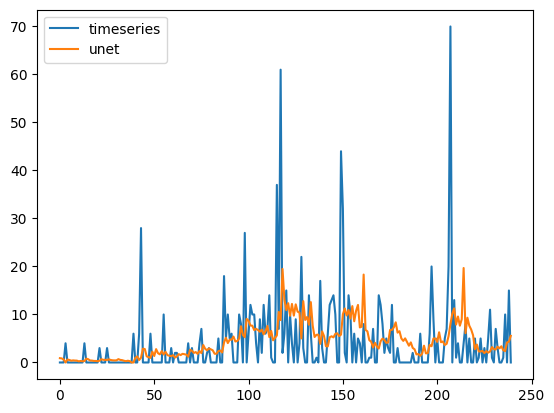

In [175]:
px = 70
py = 65
ch_id = 2
ts = 0
plt.plot(trues[:,ts,ch_id,px, py], label='timeseries')
plt.plot(preds1[:,ts,ch_id,px, py], label='unet')
#plt.plot(preds2[:,0,ch_id,px, py], label='unet reg')
#plt.plot(preds3[:,0,ch_id,px, py], label='hid')
#plt.plot(preds4[:,0,ch_id,px, py], label='hid reg')
#plt.plot(preds5[:,ts,ch_id,px, py], label='unet grad')
plt.legend()

In [32]:
px = 52
py = 52
ch_id = 2
ts = 100
plt.plot(trues[ts,:,ch_id,px, py], label='timeseries')
plt.plot(preds1[ts,:,ch_id,px, py], label='unet')
plt.plot(preds2[ts,:,ch_id,px, py], label='unet reg')
plt.plot(preds3[ts,:,ch_id,px, py], label='hid')
plt.plot(preds4[ts,:,ch_id,px, py], label='hid reg')
plt.legend()

In [21]:
# calculate mean of std of :,:,1,52,52
std1 = np.std(trues[:,:,1,52,52], axis=1)
std2 = np.std(preds[:,:,1,52,52], axis=1)
std3 = np.std(preds1[:,:,1,52,52], axis=1)
std4 = np.std(preds2[:,:,1,52,52], axis=1)

print (np.mean(std1))
print (np.mean(std2))
print (np.mean(std3))
print (np.mean(std4))

23.583155
1.1012225
1.2929058
2.2629595


In [63]:
#plt.plot(trues[:,0,0,52,52], label='timeseries')
#plt.plot(preds1[:,0,0,52,52], label='preds')
px,py=20,20
plt.plot(std_trues[:,0,px,py], label='True Std')
plt.plot(std_preds[:,0,px,py], label='unet')
plt.plot(std_preds1[:,0,px,py], label='hid')
plt.plot(std_preds2[:,0,px,py], label='Sim Unet')
plt.legend()

NameError: name 'std_preds' is not defined

(array([  0.,   0.,   0.,   0.,   0., 240.,   0.,   0.,   0.,   0.]),
 array([-0.5       , -0.40000001, -0.30000001, -0.2       , -0.1       ,
         0.        ,  0.1       ,  0.2       ,  0.30000001,  0.40000001,
         0.5       ]),
 <BarContainer object of 10 artists>)

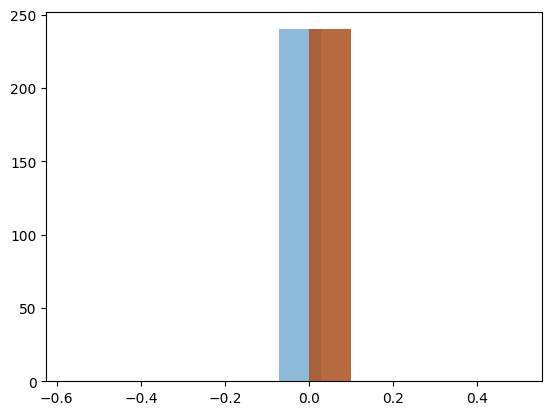

In [7]:
# plot distribution of trues, preds and preds1
px, py = 52, 52
plt.hist(trues[:,0,1,px,py].flatten(), alpha=0.5, label='trues')
plt.hist(preds[:,0,1,px,py].flatten(), alpha=0.5, label='unet')
bin_r = list(range(40))
plt.hist(preds1[:,0,1,px,py].flatten(), alpha=0.5, label='hid')
plt.hist(preds2[:,0,1,px,py].flatten(), alpha=0.5, label='bnrelu')

In [90]:
# convert preds to int
preds = np.round(preds)

In [76]:
preds.shape

(240, 6, 4, 128, 128)

In [11]:
trues.min()

-0.0723272

In [194]:
data = preds3[100,:,2,:,:] 
# the first dimension is the time dimension

from matplotlib.animation import FuncAnimation


# Create a figure and axis
fig, ax = plt.subplots()

# increase size of plot 
fig.set_size_inches(10, 10)
# Create an empty plot with initial data
#img = ax.imshow(data[0], cmap='viridis', animated=True)
img = ax.imshow(data[0], cmap='viridis', animated=True, vmin=0, vmax=15)

# Function to update the plot for each frame
def update(frame):
    img.set_array(data[frame])  # Update the image data for the current frame
    return img,

# Create the animation
animation = FuncAnimation(fig, update, frames=range(6), interval=200, blit=True)

# Display the animation
from IPython.display import HTML
HTML(animation.to_jshtml())

In [129]:
# save animation as a gif
animation.save('incep.gif', writer='imagemagick')

In [123]:
mse = np.mean((trues - preds)**2, axis=0)
mse1 = np.mean((trues - preds2)**2, axis=0)

In [61]:
mse1[0,1,52,52]

892.9958

In [124]:
# sum over first axis in preds1 and trues1 and divide by 240
preds1 = np.sum(preds2, axis=0)
#trues = np.sum(trues, axis=0)
preds1 = preds1 / 240
#trues = trues / 240

In [31]:
preds1.shape

(1, 1, 128, 128)

In [34]:
mse1.shape

(1, 1, 128, 128)

In [48]:
%matplotlib qt5

In [60]:
mse1[52,52]

904.0

In [125]:
# take mean of mse and mse1 over first axis 
mse = np.mean(mse, axis=0)
mse1 = np.mean(mse1, axis=0)
print (mse1[1,52,52])

15.670799


In [126]:
# round values to nearest integer in mse1
mse1 = np.round(mse1[1])


In [127]:
mse  = np.round(mse[1])

In [58]:
mse[52,52]

478.0

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random binary image (128x128)
image = preds2[0,0,1]

# Calculate the figure size based on the image size
fig_width = max(16, image.shape[1] * 0.5)
fig_height = max(12, image.shape[0] * 0.5)

# Create a figure with adjusted size
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

color = np.where(mse > mse1, 'red', np.where(mse < mse1, 'blue', 'green'))
# Display the image with labeled pixels
im = ax.imshow(image, cmap='gray')
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if mse1[i, j] > 0 or mse[i, j] > 0:
            ax.text(j, i, str(int(image[i,j]))+','+str(mse[i, j])+","+str(mse1[i,j]),
                    ha='center', va='center', color=color[i,j], fontsize=10)

# Add colorbar
cbar = fig.colorbar(im)

# Set labels and title
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Pixel Value Visualization')

# Show the plot
plt.show()


In [68]:
mse.shape

(128, 128)

In [70]:
str(mse[i, j])+","+str(mse1[i,j])

'13.0,3.0'